The Numpy Stack in Python
===========

Compare a List to a NumPy array:
--

In [1]:
import numpy as np

L = [1,2,3]
A = np.array([1,2,3])

for e in L:
    print e
    
for e in A:
    print e

1
2
3
1
2
3


In [2]:
L.append(4)
L

[1, 2, 3, 4]

or 

In [3]:
L = L + [5]
L

[1, 2, 3, 4, 5]

In [4]:
L2 = []
for e in L:
    L2.append(e+e)

L2

[2, 4, 6, 8, 10]

There is no method of append on a NumPy array:
We can use vector addition
----

In [5]:
A + A

array([2, 4, 6])

So the 1st lesson is + sign with Lists does concatenation while + sign with NumPy does vector addition.
---

In [6]:
2*L

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [7]:
2*A

array([2, 4, 6])

If you wanted to get the List elements to multiply, then you need to use the for loop.
---

In [8]:
L2 = []
for e in L:
    L2.append(e*e)
L2

[1, 4, 9, 16, 25]

In [9]:
A**2

array([1, 4, 9])

In [10]:
np.sqrt(A)

array([ 1.        ,  1.41421356,  1.73205081])

In [11]:
np.log(A)

array([ 0.        ,  0.69314718,  1.09861229])

In [12]:
np.exp(A)

array([  2.71828183,   7.3890561 ,  20.08553692])

Dot Products
=====
$\mathbf{a}\cdot \mathbf{b}=\mathbf{a}^T\mathbf{b}=\sum _{d=1}^D a_d b_d$

$\mathbf{a} \cdot \mathbf{b}=\| \mathbf{a} \|\| \mathbf{b} \|\cos \theta _{\text{ab}}$

$\cos \theta _{\text{ab}}=\frac{\mathbf{a}^T\mathbf{b}}{\| \mathbf{a} \|\| \mathbf{b} \|}$

In [13]:
a = np.array([1,2])
b = np.array([2,1])

Slow dot product using for loops:
---

In [14]:
dot = 0
for e,f in zip(a,b):
    dot += e*f

dot

4

Fast using NumPy:
---

In [15]:
np.sum(a*b)

4

or as an alternative you could use the sum function as it's a instance method of numpy array itself

In [16]:
(a*b).sum()

4

With NumPy there's a more convenient way through the dot() function.
---

In [17]:
np.dot(a,b)

4

In [18]:
a.dot(b)

4

In [19]:
b.dot(a)

4

Angle between vectors requires us to calculate the length or magnitude of the vectors.
---
$\| \mathbf{a} \|=\sqrt{a_1^2+a_2^2+a_3^2+...+a_n^2+}$

In [20]:
amag=np.sqrt((a*a).sum())
amag

2.2360679774997898

As part of the Linear Algebra library within NumPy, we can use a convenient function: np.linalg.norm()

In [21]:
amag=np.linalg.norm(a)
amag

2.2360679774997898

Let's calculate the angle:

In [22]:
cosangle=a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b))
cosangle

0.79999999999999982

In [23]:
angle=np.arccos(cosangle)
angle

0.6435011087932847

Let's compare the for loop version of the dot product to numpy internal function with respect to speed.
---

In [24]:
from datetime import datetime

a = np.random.randn(100)
b = np.random.randn(100)
T = 100000

def slow_dot_product(a, b):
    result = 0
    for e, f in zip(a, b):
        result += e*f
    return result

t0 = datetime.now()
for t in xrange(T):
    slow_dot_product(a, b)
dt1 = datetime.now() - t0

t0 = datetime.now()
for t in xrange(T):
    a.dot(b)
dt2 = datetime.now() - t0

print "dt1 / dt2:", dt1.total_seconds() / dt2.total_seconds()
print "For Loop, dt1 (seconds):", dt1.total_seconds()
print "Numpy, dt2 (seconds):", dt2.total_seconds()

dt1 / dt2: 33.3934410535
For Loop, dt1 (seconds): 9.417852
Numpy, dt2 (seconds): 0.282027


Vectors & Matrices
===
We've seen that a NumPy array's is like a vector.  We can add, multiply, and do elementwise operations like square them.  Matrices are similiar to lists of lists; in fact, you can use a list of lists.

In [25]:
M = np.array([[1,2],[3,4]])

So the convention is that the 1st index is the row and the 2nd is the column.  Let's create and actual lists of list for reference.

In [26]:
L = [[1,2],[3,4]]

Say we want to get an element of the matrix to get the 1.  With a List we would 1st index the row and that would give us the 1st list which contains [1,2].

In [27]:
L[0]

[1, 2]

In [28]:
L[0][0]

1

Notice we can do the same thing to the numpy array.

In [29]:
M[0][0]

1

Here's a shorthand notation like matlab with a comma.

In [30]:
M[0,0]

1

There is an actual datatype in NumPy called a matrix.

In [31]:
M2 = np.matrix([[1,2],[3,4]])
M2

matrix([[1, 2],
        [3, 4]])

Note: This works somewhat similarly to a numpy array, but it's not exactly the same.  Most of the time, we use NumPy arrays and the official documentation recommends against using matrix.  So if you see or plan to use matrix, then you should try to convert it to an array. You can do that by using np.array(M2).

In [32]:
A = np.array(M2)
A

array([[1, 2],
       [3, 4]])

Even though this is an array, we still have convenient matrix operations.  So as an example A.T gives use the transpose.

In [33]:
A.T

array([[1, 3],
       [2, 4]])

Generating Matrices to Work With
===

Sometimes you just need some arrays to try stuff out.  What if I want an array of size 100 or with random numbers. Here's an array of all zeros.

In [34]:
Z = np.zeros(10)
Z

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

A 10x10 matrix of all zeros.

In [35]:
Z = np.zeros((10,10))
Z

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Equivalently, a matrix of all 1s.

In [36]:
O = np.ones((10,10))
O

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

Let's create a uniformly distributed random matrix.

R = np.random.random((10,10))
R

For a Gaussian distributed random 10x10 matrix with a Mean of 0 and Standard Deviation of 1.

In [37]:
G = np.random.randn(10,10)
G

array([[ 1.62176968, -0.25257254,  0.98997   , -0.85319175,  0.62779878,
        -0.26190287, -0.25715027, -0.63481576, -0.52794478, -0.8397748 ],
       [-0.85990356, -1.27881965,  0.19186452,  0.79416155, -0.21570394,
        -0.85119802,  0.95704623, -1.50009116,  0.9731477 ,  2.26556073],
       [ 1.88368767,  1.59552536, -0.52537096, -0.81385525, -0.48939426,
        -0.18141641,  0.49301724, -0.61980661,  0.82378291,  2.24828532],
       [ 0.41900148,  0.3426759 , -1.10763079,  0.26390068, -0.05549941,
         0.17607448,  0.69066825, -0.9144845 ,  0.08521773, -0.44552438],
       [-0.68424639, -0.75892115,  0.02130814, -0.7361615 , -0.17514659,
        -0.89581986, -1.93729649, -0.16499933, -1.15644526,  0.4363419 ],
       [ 0.15136876, -0.37739408, -0.76716571, -0.76957563, -0.55384388,
        -0.39222525, -0.88171373,  1.38080057,  0.33626204, -0.26559117],
       [-0.21887461,  2.87591796, -0.77708308,  1.01443753, -0.1354509 ,
         0.34716842, -0.28704725, -1.1741247 

NumPy array also have convenient functions to calculate descriptive statistics.

In [38]:
G.mean()

-0.072153760192834898

In [39]:
G.var()

1.1609953952255403

Matrix Products
===
Remember from Linear Algebra in order for multiplication between 2 matrices to happen, the inner dimensions must match.

(1) If we have A of size (2,3) and B of size (3,3)

    (a) We can multiply AB (inner dimensions is 3)
    
    (b) We cannot multiply BA (inner dimensions is 3/2)

(2) $C(i,j) = \sum_k^KA(i,k)B(k,j)$

(3) (i,j)th entry of C is the dot product of row A(i,:) and column B(:,j)

(4) In NumPy: C = A.dot(B)

It's very natural to want to do C(i,j)=A(i,j)*B(i,j) which is element-wise multiplication.  The asterisk does this for vectors and it also works for multidimensional arrays.

(5) In Deep Learning the operators $\otimes$ or $\circledcirc$ sometimes denote element-wise multiplication.

In [40]:
A = np.array([[1,2],[3,4]])
Ainv = np.linalg.inv(A)
Ainv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [41]:
Ainv.dot(A)

array([[  1.00000000e+00,   4.44089210e-16],
       [  0.00000000e+00,   1.00000000e+00]])

In [42]:
A.dot(Ainv)

array([[  1.00000000e+00,   1.11022302e-16],
       [  0.00000000e+00,   1.00000000e+00]])

In [43]:
np.linalg.det(A)

-2.0000000000000004

In [44]:
np.diag(A)

array([1, 4])

In [45]:
np.diag([1,2])

array([[1, 0],
       [0, 2]])

Outer Product & Inner Product
---
Outer Product is the Tensor Product of 2 Vectors: $\mathbf{a}_{i}$ 
and 
$\mathbf{b}_{j}$

$\mathbf{c}_{i,j}=\mathbf{a}_{i}\otimes \mathbf{b}_{j}$
    
$\sum=E{[(x-\mu)(x-\mu)^{T}]}\approx\frac{1}{N-1}\sum_n^N(x_n-\overline{x})(x_n-\overline{x})^T$

Inner Product:

$\langle\mathbf{a}\mathbf{b}\rangle$

Is another name for a generalized dot product.  Unlike the dot product between two vectors, inner products in general can be defined even on infinite dimensional vector spaces.

In [46]:
a = np.array([1,2])
b = np.array([3,4])
c = np.outer(a,b)
c

array([[3, 4],
       [6, 8]])

In [47]:
np.inner(a,b)

11

In [48]:
a.dot(b)

11

In [49]:
np.diag(c)

array([3, 8])

In [50]:
np.diag(c).sum()

11

In [51]:
np.trace(c)

11

Eigenvalues and Eigenvectors
===

Linear equations $\mathbf{Ax}=\mathbf{b}$ come from steady state problems. Eigenvalues have their greatest importance in dynamic problems. The solution of $\frac{\text{d}\mathbf{u}}{\text{d}t}=A\mathbf{u}$ is changing with time—
growing or decaying or oscillating. We can’t find it by elimination. This chapter enters a
new part of linear algebra, based on $\mathbf{Ax}=\lambda\mathbf{x}$. All matrices in this chapter are square.
A good model comes from the powers $\mathbf{A}, \mathbf{A^2}, \mathbf{A^3}, ...$ of a matrix. Suppose you need the
hundredth power $\mathbf{A^{100}}$. The starting matrix A becomes unrecognizable after a few steps,
and $\mathbf{A^{100}}$ is very close to [.6 .6; .4 .4]:

$\mathbf{A}=\begin{bmatrix}8 & 3 \\2 & 7 \end{bmatrix} \mathbf{A^2}=\begin{bmatrix}70 & 45 \\30 & 55 \end{bmatrix}
\mathbf{A^3}=\begin{bmatrix}650 & 525 \\350 & 475 \end{bmatrix} ... \mathbf{A^{100}}=\begin{bmatrix}6000 & 6000 \\4000 & 4000 \end{bmatrix}$

$\mathbf{A^{100}}$ was found by using the eigenvalues of $\mathbf{A}$, not by multiplying 100 matrices. Those
eigenvalues (here they are 1 and 1/2) are a new way to see into the heart of a matrix.
To explain eigenvalues, we first explain eigenvectors. Almost all vectors change direction,
when they are multiplied by $\mathbf{A}$. Certain exceptional vectors x are in the same
direction as $\mathbf{Ax}$. Those are the “eigenvectors”. Multiply an eigenvector by $\mathbf{A}$, and the
vector $\mathbf{Ax}$ is a number $\lambda$ times the original $\mathbf{x}$.


<center>The basic equation is $\mathbf{Ax}=\lambda\mathbf{x}$. The number $\lambda$ is an eigenvalue of $\mathbf{A}$.</center>

SOURCE:http://math.mit.edu/~gs/linearalgebra/

In [52]:
X = np.random.randn(100,3)
cov = np.cov(X)
cov.shape

(100, 100)

When you calculate a covariance matrix, you must transpose it 1st.

In [53]:
cov = np.cov(X.T)
cov

array([[ 0.96179911, -0.15257748,  0.02974021],
       [-0.15257748,  0.9622282 , -0.00379275],
       [ 0.02974021, -0.00379275,  0.83162583]])

In NumPy there are two types of eigenvector and eigenvalues:
(1) eigenvalues,eigenvector = np.eig()
OR
(2) eigenvalues,eigenvector = np.eigh()
eigh is for symmetric and Hermitian matrices

Symmetric means $\mathbf{A}=\mathbf{A^T}$

Hermitan means $\mathbf{A}=\mathbf{A^H}$

$\mathbf{A^H}$ is the conjugate transpose of 
$\mathbf{A}$

In [54]:
np.linalg.eigh(cov)

(array([ 0.79863235,  0.8404509 ,  1.11656989]),
 array([[ 0.63630494,  0.30711218, -0.70767092],
        [ 0.58170204,  0.41151321,  0.7016264 ],
        [-0.50669395,  0.85810196, -0.08320011]]))

In [55]:
np.linalg.eig(cov)

(array([ 1.11656989,  0.79863235,  0.8404509 ]),
 array([[-0.70767092,  0.63630494,  0.30711218],
        [ 0.7016264 ,  0.58170204,  0.41151321],
        [-0.08320011, -0.50669395,  0.85810196]]))

Solving a Linear System
===

Problem: $\mathbf{Ax=b}$

Solution: $\mathbf{A}^{-1}\mathbf{Ax=x=}\mathbf{A}^{-1}\mathbf{b}$

(1) Is a system of D equations and D unkowns

(2) $\mathbf{A}$ is DxD, assume it is invertable

(3) We have all the tools we need to solve this already:

    (a) Matrix inverse

    (b) Matrix multiply (dot)

In [56]:
A

array([[1, 2],
       [3, 4]])

In [57]:
b = np.array([1,2])
b

array([1, 2])

In [58]:
x = np.linalg.inv(A).dot(b)
x

array([  2.22044605e-16,   5.00000000e-01])

Never use the inv() method and only use solve(); it's more efficient and more accurate.

In [59]:
x = np.linalg.solve(A,b)
x

array([ 0. ,  0.5])

Pandas
===
Load data into an a Matrix
---

In [63]:
X =[]

import numpy as np

for line in open ("/home/mike/Downloads/machine_learning_examples-master/linear_regression_class/data_2d.csv"):
    row = line.split(',')
    sample = map(float, row)
    X.append(sample)
    
X

[[17.9302012052, 94.5205919533, 320.259529602],
 [97.1446971852, 69.5932819844, 404.634471526],
 [81.7759007845, 5.73764809688, 181.485107741],
 [55.8543424175, 70.3259016768, 321.773638018],
 [49.3665499855, 75.1140401571, 322.465485583],
 [3.19270246506, 29.2562988631, 94.6188108954],
 [49.2007840582, 86.1444385075, 356.348092747],
 [21.882803904, 46.8415051959, 181.653769226],
 [79.5098627219, 87.397355535, 423.557743194],
 [88.1538874975, 65.2056419279, 369.229245443],
 [60.7438543399, 99.9576339008, 427.605803661],
 [67.4155819451, 50.3683096094, 292.471821553],
 [48.3181157719, 99.1289531425, 395.529811407],
 [28.8299719729, 87.1849488537, 319.031348455],
 [43.853742664, 64.4736390798, 287.4281441],
 [25.3136940868, 83.5452942552, 292.768908839],
 [10.807726675, 45.6955685904, 159.663307674],
 [98.365745882, 82.6973935253, 438.798963866],
 [29.1469099692, 66.3651067611, 250.986309034],
 [65.1003018959, 33.3538834975, 231.711507921],
 [24.6441134909, 39.5400527406, 163.398160832],

In [ ]:
X = np.array(X)
X.shape

Dataframes
---

In [64]:
import pandas as pd
X = pd.read_csv("/home/mike/Downloads/machine_learning_examples-master/linear_regression_class/data_2d.csv", header=None)
type(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


In [65]:
X.head()

,0,1,2
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486


In [66]:
X.head(7)

,0,1,2
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486
5,3.192702,29.256299,94.618811
6,49.200784,86.144439,356.348093


More about DataFrames: Selecting Rows and Columns
---

In [67]:
M = X.as_matrix()
type(M)

numpy.ndarray

In [68]:
X[0]

0     17.930201
1     97.144697
2     81.775901
3     55.854342
4     49.366550
5      3.192702
6     49.200784
7     21.882804
8     79.509863
9     88.153887
10    60.743854
11    67.415582
12    48.318116
13    28.829972
14    43.853743
15    25.313694
16    10.807727
17    98.365746
18    29.146910
19    65.100302
20    24.644113
21    37.559805
22    88.164506
23    13.834621
24    64.410844
25    68.925992
26    39.488442
27    52.463178
28    48.484787
29     8.062088
        ...    
70    30.187692
71    11.788418
72    18.292424
73    96.712668
74    31.012739
75    11.397261
76    17.392556
77    72.182694
78    73.980021
79    94.493058
80    84.562821
81    51.742474
82    53.748590
83    85.050835
84    46.777250
85    49.758434
86    24.119257
87    27.201576
88     7.009596
89    97.646950
90     1.382983
91    22.323530
92    45.045406
93    40.163991
94    53.182740
95    46.456779
96    77.130301
97    68.600608
98    41.693887
99     4.142669
Name: 0, dtype: float64

In [69]:
X.head()

,0,1,2
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486


In [70]:
type(X[0])

pandas.core.series.Series

In [71]:
X.iloc[0]

0     17.930201
1     94.520592
2    320.259530
Name: 0, dtype: float64

In [72]:
X.ix[0]

0     17.930201
1     94.520592
2    320.259530
Name: 0, dtype: float64

In [73]:
type(X.ix[0])

pandas.core.series.Series

In [74]:
X[[0,2]]

,0,2
0,17.930201,320.259530
1,97.144697,404.634472
2,81.775901,181.485108
3,55.854342,321.773638
4,49.366550,322.465486
5,3.192702,94.618811
6,49.200784,356.348093
7,21.882804,181.653769
8,79.509863,423.557743
9,88.153887,369.229245


In [75]:
X[X[0]<5]

,0,1,2
5,3.192702,29.256299,94.618811
44,3.593966,96.252217,293.237183
54,4.593463,46.335932,145.818745
90,1.382983,84.944087,252.905653
99,4.142669,52.254726,168.034401


In [76]:
X[0]<5

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
90     True
91    False
92    False
93    False
94    False
95    False
96    False
97    False
98    False
99     True
Name: 0, dtype: bool

In [77]:
type(X[0]<5)

pandas.core.series.Series

Even more about Dataframes: Column Names
---

In [101]:
df = pd.read_csv('/home/mike/Downloads/machine_learning_examples-master/airline/international-airline-passengers.csv', engine='python', skipfooter=3)
df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [81]:
df.columns

Index([u'Month', u'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [82]:
df.columns=["month","passengers"]
df.columns

Index([u'month', u'passengers'], dtype='object')

In [83]:
df['passengers']

0      112
1      118
2      132
3      129
4      121
5      135
6      148
7      148
8      136
9      119
10     104
11     118
12     115
13     126
14     141
15     135
16     125
17     149
18     170
19     170
20     158
21     133
22     114
23     140
24     145
25     150
26     178
27     163
28     172
29     178
      ... 
114    491
115    505
116    404
117    359
118    310
119    337
120    360
121    342
122    406
123    396
124    420
125    472
126    548
127    559
128    463
129    407
130    362
131    405
132    417
133    391
134    419
135    461
136    472
137    535
138    622
139    606
140    508
141    461
142    390
143    432
Name: passengers, dtype: int64

In [84]:
df['ones']=1
df.head()

,month,passengers,ones
0,1949-01,112,1
1,1949-02,118,1
2,1949-03,132,1
3,1949-04,129,1
4,1949-05,121,1


The apply() function
---

What if you want to assign a new column value where each cell is derived from the values already in it's row? For example, modeling an interaction between X1 and X2 -> X1*X2 requires the apply function.

df['x1x2']=df.apply(lambda row: row['x1']*row['x2'], axis=1)

Pass in the axis=1 so the function get's applied each row instead of each column. Think of it like Python's map function.

If you're not familiar with lambda, this is equivalent: 
    
    def get_interaction(row):
        return row['x1']*row['x2']
        
df['x1x2']=df.apply(get_interaction,axis=1)

Notice that Function you pass in takes 1 argument, the row. This is equivalent to:

interactions = []
for idx, row indf.iterrows();
    x1x2 = row['x1'] * row['x2']
    interactions.append(x1x2)
    
df['x1x2']=interactions

Of course, you should never do this because for loops are very slow.



In [85]:
from datetime import datetime

In [86]:
datetime.strptime("1949-05","%Y-%m")

datetime.datetime(1949, 5, 1, 0, 0)

In [89]:
df['dt']=df.apply(lambda row: datetime.strptime(row["month"], "%Y-%m"),axis=1)

In [100]:
# Let's call the df.info() to confirm the datetime column "dt" contains the datetime objects. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
month         144 non-null object
passengers    144 non-null int64
ones          144 non-null int64
dt            144 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ KB


Joins
---

In [103]:
t1 = pd.read_csv('/home/mike/Downloads/machine_learning_examples-master/numpy_class/table1.csv')
t2 = pd.read_csv('/home/mike/Downloads/machine_learning_examples-master/numpy_class/table2.csv')

In [104]:
t1

,user_id,email,age
0,1,alice@gmail.com,20
1,2,bob@gmail.com,25
2,3,carol@gmail.com,30


In [106]:
t2

,user_id,ad_id,click
0,1,1,1
1,1,2,0
2,1,5,0
3,2,3,0
4,2,4,1
5,2,1,0
6,3,2,0
7,3,1,0
8,3,3,0
9,3,4,0


In [109]:
m = pd.merge(t1,t2,on='user_id')
m

,user_id,email,age,ad_id,click
0,1,alice@gmail.com,20,1,1
1,1,alice@gmail.com,20,2,0
2,1,alice@gmail.com,20,5,0
3,2,bob@gmail.com,25,3,0
4,2,bob@gmail.com,25,4,1
5,2,bob@gmail.com,25,1,0
6,3,carol@gmail.com,30,2,0
7,3,carol@gmail.com,30,1,0
8,3,carol@gmail.com,30,3,0
9,3,carol@gmail.com,30,4,0


In [112]:
# or equivalently
t1.merge(t2, on='user_id')

,user_id,email,age,ad_id,click
0,1,alice@gmail.com,20,1,1
1,1,alice@gmail.com,20,2,0
2,1,alice@gmail.com,20,5,0
3,2,bob@gmail.com,25,3,0
4,2,bob@gmail.com,25,4,1
5,2,bob@gmail.com,25,1,0
6,3,carol@gmail.com,30,2,0
7,3,carol@gmail.com,30,1,0
8,3,carol@gmail.com,30,3,0
9,3,carol@gmail.com,30,4,0


Matplotlib
===

Line Charts
---

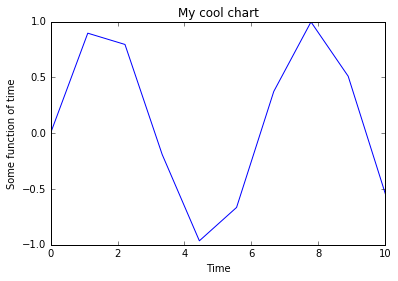

In [93]:
# I used %matplotlib inline in the first cell of the notebook.
# Otherwise, the plot will appear outside of the notebook.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,10)
y = np.sin(x)

plt.plot(x,y)
plt.xlabel("Time")
plt.ylabel("Some function of time")
plt.title("My cool chart")
plt.show()

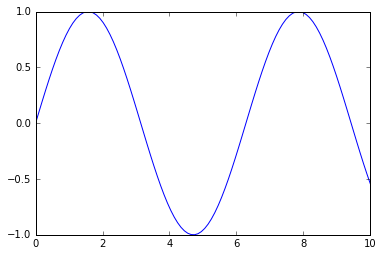

In [94]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y)
plt.show()

Scatterplots
---

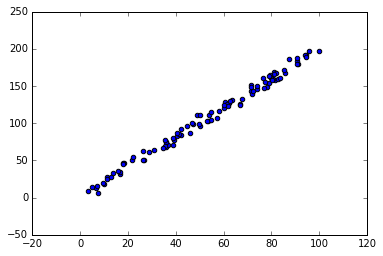

In [96]:
import pandas as pd
A = pd.read_csv('/home/mike/Downloads/machine_learning_examples-master/linear_regression_class/data_1d.csv',header=None).as_matrix()

x = A[:,0]
y = A[:,1]

plt.scatter(x,y)
plt.show()

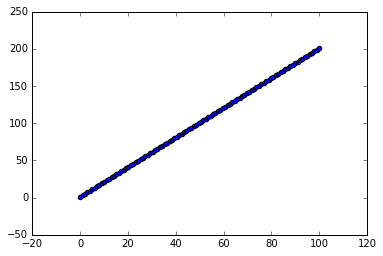

In [97]:
x_line = np.linspace(0,100,100)
y_line = 2*x_line + 1
plt.scatter(x_line,y_line)
plt.show()

Histograms
---

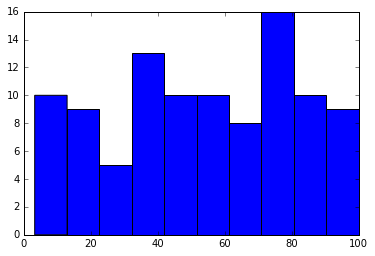

In [98]:
plt.hist(x)
plt.show()

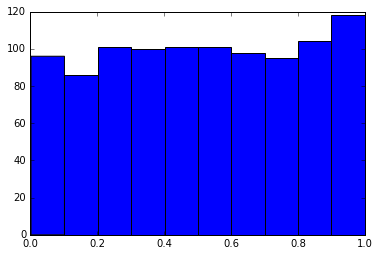

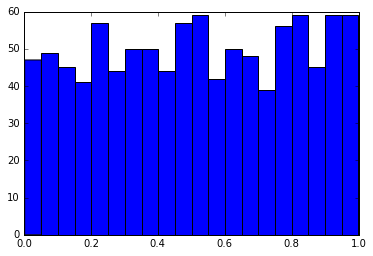

In [99]:
R = np.random.random(1000)
plt.hist(R)
plt.show()
plt.hist(R,bins=20)
plt.show()

Plotting Images
---

Each value in the matrix is the intensity of the pixel in that location.  PNG and JPG are not matrices beacuse they are compressed.  Decompressing them will allow you to get the matrices.  Let's take a look at the MNIST dataset of handwritten digits.
https://kaggle.com/c/digit-recognizer

In [113]:
df = pd.read_csv('/home/mike/Downloads/train.csv')

In [114]:
df.shape

(42000, 785)

In [116]:
M = df.as_matrix()
im = M[0,1:]
im.shape

(784,)

In [117]:
im = im.reshape(28,28)

In [118]:
im.shape

(28, 28)

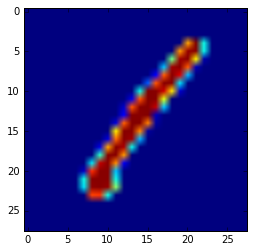

In [119]:
plt.imshow(im)

In [120]:
M[0,0]

1

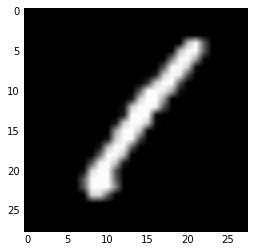

In [121]:
plt.imshow(im, cmap='gray')

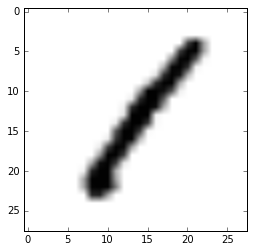

In [122]:
plt.imshow(255 - im, cmap='gray')

Scipy
===

Gaussian PDF and CDF
---

Probability Density Function (PDF):
$X \sim \mathcal{N}(\mu,\,\sigma^{2})\,$

or 

$f(x\  | \ \mu , \sigma ^2)=\frac{1}{\sqrt{2\pi}\sigma}e^{-(x-\mu)^2/(2\sigma^2)}
$

Your probably thinking we could just write the function using standard operations, but Scipy is much faster.

In [127]:
from scipy.stats import norm

find the probability density of 0 from the standard normal distribution.

In [128]:
norm.pdf(0)

0.3989422804014327

If your working the a normal distribution where the mean (loc) is not 0 or the standard deviation (scale) is not 1, then you can pass the mean and std dev.

In [129]:
norm.pdf(0, loc=5, scale=10)

0.035206532676429952